In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Drive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [41]:
# reading data from csv
df = pd.read_csv("/content/drive/MyDrive/Data Handling and Visualisation/GDP in covid 19.csv")

In [42]:
# Converting the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'])

In [43]:
#Funtions for chart

def pie_chart(title, data):
  plt.figure(figsize=(5, 5))
  plt.pie(data, labels=data.index, autopct='%1.1f%%')
  plt.title(title)
  plt.show()

def bar_chart(title, y_values, x_values, x_label, y_label):
  plt.figure(figsize=(8, 4))
  plt.bar(y_values, x_values)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.xticks(rotation=90)
  plt.show()

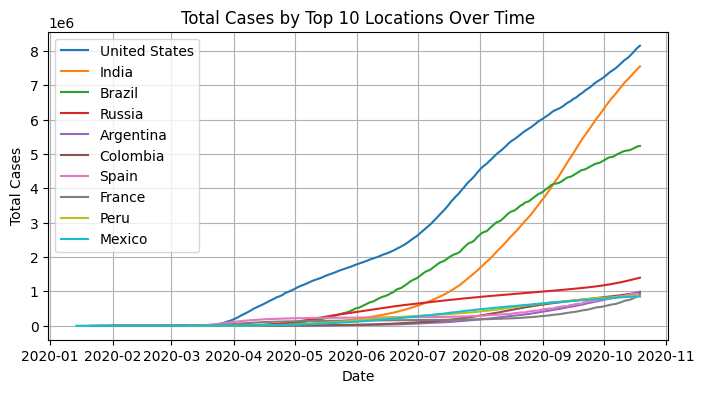

In [44]:
#line plot
location_total_cases = df.groupby('location')['total_cases'].max()
top_10_locations = location_total_cases.nlargest(10).index

plt.figure(figsize=(8, 4))
for location in top_10_locations:
    location_data = df[df['location'] == location]
    plt.plot(location_data['date'], location_data['total_cases'], label=location)

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total Cases by Top 10 Locations Over Time')
plt.legend()
plt.grid(True)
plt.show()


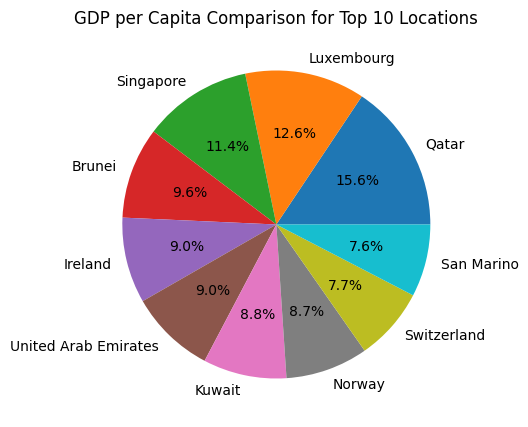

In [48]:
#pie chart
location_avg_gdp = df.groupby('location')['gdp_per_capita'].mean()
top_10_locations = location_avg_gdp.nlargest(10)

#calling pie chart funtion
pie_chart('GDP per Capita Comparison for Top 10 Locations', top_10_locations)

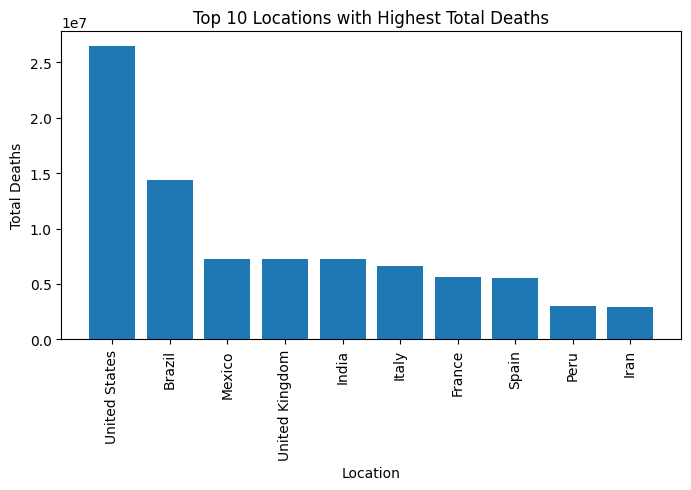

In [47]:
# bar plot
location_total_deaths = df.groupby("location")["total_deaths"].sum().reset_index()
top_10_locations = location_total_deaths.sort_values(by="total_deaths", ascending=False).head(10)

#calling bar chart funtion
bar_chart("Top 10 Locations with Highest Total Deaths",
          top_10_locations["location"],
          top_10_locations["total_deaths"],
          "Location", "Total Deaths")

# New section